Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



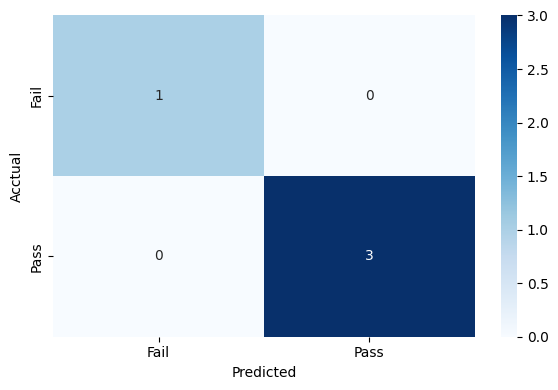

-----Predict Your Result------
Prediciton based on input: Pass


C:\Users\amrit\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

features = ['StudyHours', 'Attendance', 'PastScore', 'SleepHours']

scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

X= df_scaled[features]
y = df_scaled['Passed']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)


model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


model = LogisticRegression()

model.fit(X_train, y_train)

conf_matrix = confusion_matrix(y_test, y_pred)


print("Classification Report")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail","Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Acctual")
plt.tight_layout()
plt.show()


print("-----Predict Your Result------")

try:
    study_hours = float(input("Enter StudyHour: "))
    attendance = float(input(" enter attendance: "))
    past_score = float(input("Enter your past score: "))
    sleep_hours = float(input("enter your sleep hour: "))


    user_input_df = pd.DataFrame([{
    'StudyHours':study_hours,
    'Attendance':attendance,
    'PastScore':past_score,
    'SleepHours':sleep_hours
    }])

    user_input_scaled = scaler.transform(user_input_df)

    prediction = model.predict(user_input_scaled)[0]

    result = "Pass" if prediction ==1 else "Fail"

    print(f"Prediciton based on input: {result}")

except Exception as e:
    print("error has occured")

